# 1. RNN

## 1.1 순차(Sequence) 데이터
- 순서에 의미가 있고, 순서가 달라지면 의미가 달라지는 데이터
- 예시: 음성 및 오디오, 자연어, 생물학적 서열, 비디오 데이터 등

- 순차 데이터는 일반적인 정형 데이터와 달리 **요소의 순서 의존성과 자기 상관성**을 가진다
    - 요소의 순서 의존성: 요소들의 순서 자체가 핵심 정보
    - 자기 상관성: 이전 시점의 데이터가 다음 시점의 데이터에 영향을 줌

##### ⇒ 순서의 의미를 학습할 수 있는 특별한 신경망 필요

## 1.2 RNN의 구조와 원리

#### RNN: 순환 신경망
1. 시퀀스 데이터 입력 받아 순서 정보 유지하며 처리
2. 순환하는 은닉층이 매 시점의 은닉 상태 업데이터
3. 이전 시점의 값 현재 시점으로 넘겨준다


#### RNN의 구조
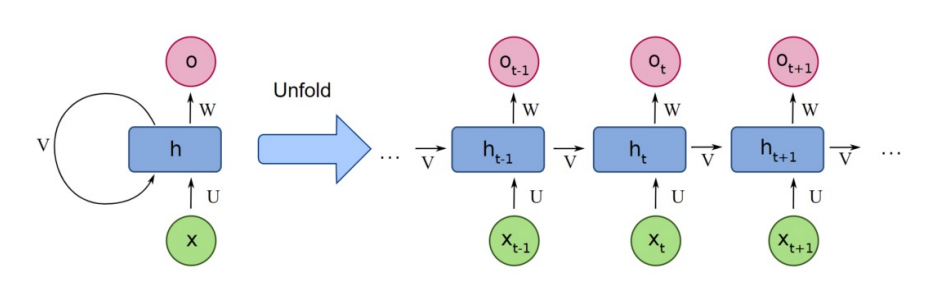
- 입력층, 은닉층, 출력층으로 이뤄진다
- $t-1$ 시점
    - 입력 $x_{t-1}$이 들어가서 은닉 상태$h_{t-1}$ 업데이트 후, 출력$o_{t-1}$을 내보낸다
- $t$ 시점
    - $t-1$ 시점에서 계산된 은닉 상태$h_{t-1}$가 $t$시점에 그대로 전달
    - 새로운 입력 $x_t$와 $h_{t-1}$가 함께 사용되어 $h_t$를 업데이트 하고 $o_t$를 내보낸다
- 이 과정이 반복되면서 과거 정보가 계속해서 기억되게 된다

#### RNN 핵심 원리: 가중치 공유
- 동일한 파라미터(입력 가중치, 순환 가중치, 편향)를 다양한 시점에서 반복해서 사용
- 길이와 시점 위치에 상관없이 효과적 작동 가능!
- 장점
    - 학습 파라미터 수 감소
    - 일반화 능력 향상


## 1.3 RNN의 한계 & 장기 의존성 문제

### RNN의 한계
- 전체 시퀀스를 읽고 역전파가 일어나면서 
    1. 기울기 소실
        - 역전파 과정 중, 기울기가 0으로 수렴
        - 시퀀스 뒤쪽의 오차가 제대로 전달 X
    2. 기울기 폭주
        - 역전파 과정 중, 기울기가 무한대로 발산산
        - 시퀀스 뒤쪽의 오차가 비정상적으로 커짐짐
    3. 느린 훈련 시간
        - 전체 시퀀스가 한번에 병렬 처리 불가

### ⇒ 장기 의존성 문제
- 시퀀스 앞 부분의 중요 정보를 잊어버리는 문제 -> 맥락 파악 능력 저하
- 장기 기억력이 좋지 못하다..

# 2. LSTM & GRU

## 2.1 LSTM
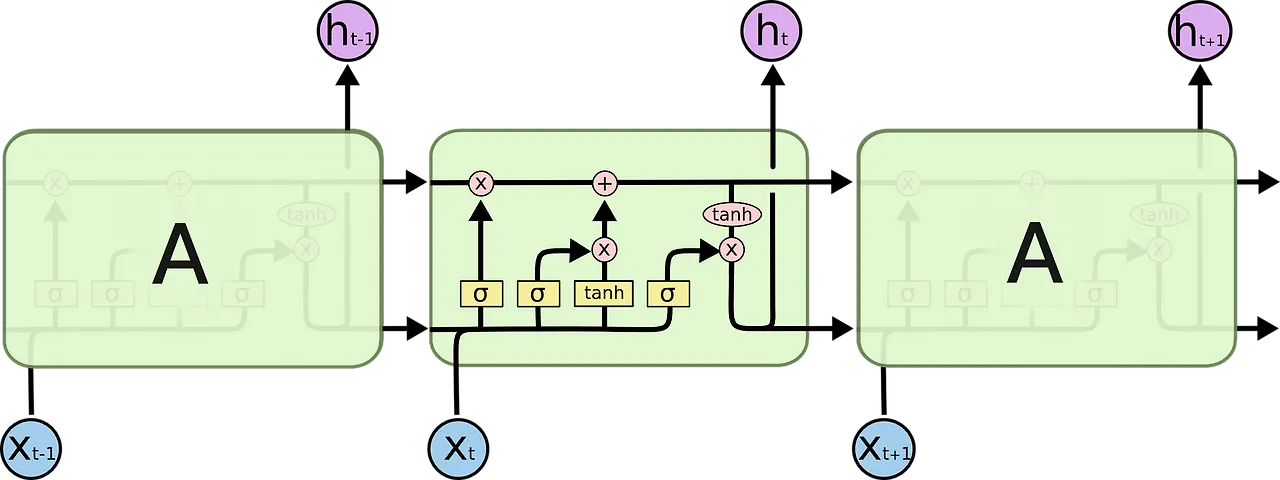

1. 중요한 정보를 선택해서 -> 오래 기억한다
2. $c_t$(장기 기억)와 $h_t$(단기 기억)의 2개의 순환되는 층 사용
3. Gate를 통해 필요한 정보만 통과 시킨다
    - Forget gate: 얼마나 잊어버릴지
    - Input gate: 얼마나 사용할지
    - Output gate: 어떤 정보를 전달할지
4. Final memory cell: input, forget gate를 결합해 현재 정보 얼마나 기억할지 계산

- 장점
    - 기울기 소실 문제 해결
- 단점
    - 복잡한 구조
    - 학습 파라미터의 증가


## 2.2 GRU
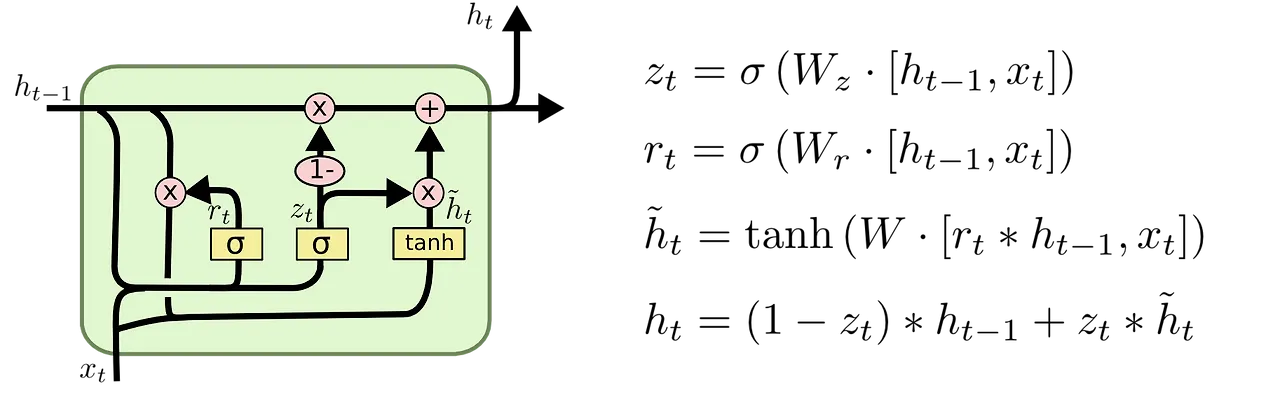
1. Forget gate + input gate => update gate 하나로!!
2. Reset gate의 사용
3. gate 개수가 3→2개로 줄어 학습 시간이 감소
    - 성능은 LSTM과 유사하거나 더 좋다


## 2.3 LSTM vs GRU

- LSTM 적합한 경우
    - 긴 시퀀스에서 문맥 이해가 중요한 경우
    - 데이터의 양이 충분하며, 복잡한 패턴
    - 모델 성능이 중요한 경우
    - 기계 번역, 언어 모델링, 장기 시계열 예측 (예시: 금융, 기후 데이터)
- GRU 적합한 경우
    - 계산 효율이 중요한 경우
    - 데이터 양이 적고, 과적합 위험 존재
    - 실시간 예측 필요
    - 예시: 음성 인식, 스트리밍 데이터, 실시간 비디오 분석 등

# 3. Seq2Seq

## 3.1 인코더와 디코더

### Seq2Seq
- 한 시퀀스를 다른 시퀀스로 변환하는 작업 수행
- 아이템의 입력 개수와 출력 개수 달라도 ok

### 인코더
- 입력된 시퀀스 읽고 압축 => 컨텍스트 벡터(context vector)로 만들기
    - context vector: 인코더 중 마지막 시점의 은닉 상태/입력 시퀀스의 요약 정보
- 입력: $t$시점의 임베딩된 단어의 입력 + $t-1$시점의 은닉상태
- 출력: $t$시점의 은닉상태
### 디코더
- context vector 바탕으로 시퀀스 생성
- t시점에 나온 출력값은 다음 시점의 입력값으로

- 인코더와 디코더 모두 RNN(or LSTM or GRU) 여러개 조합한 형태

## 3.2 병목현상
- 입력 시퀀스 길이가 길면, 고정된 크기의 context vector에 모든 정보가 담기지 X
- 모델 성능 하락으로 이어짐
- 이외의 한계: 기울기 소실 문제 / 병렬화 불가능
